***

Of all the precious metals, gold is the most popular as an investment. Investors generally buy gold as a way of diversifying risk, especially through the use of futures contracts and derivatives. The gold market is subject to speculation and volatility as are other markets. Compared to other precious metals used for investment, gold has been the most effective safe haven across a number of countries.<br><br>
The Dataset contain gold prices (in USD) from 2001 to 2019.
Our goal is to predict where the gold prices will be in the coming years

#### Import the necessary libraries

In [1]:
import pandas as pd

#### Read 'gold_price_usd.csv' & store it in a variable

In [2]:
df=pd.read_csv("gold_price_usd.csv")


#### View the first 5 rows

In [3]:
df.head(5)

Date  USD (AM)
0  2001-01-02    272.80
1  2001-01-03    269.00
2  2001-01-04    268.75
3  2001-01-05    268.00
4  2001-01-08    268.60

Date  USD (AM)
0  2001-01-02    272.80
1  2001-01-03    269.00
2  2001-01-04    268.75
3  2001-01-05    268.00
4  2001-01-08    268.60

#### Check the information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4718 non-null   object 
 1   USD (AM)  4718 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.8+ KB


#### Find the columns

In [5]:
df.columns

Index(['Date', 'USD (AM)'], dtype='object')

Index(['Date', 'USD (AM)'], dtype='object')

#### Rename USD (AM) to Price

In [6]:
df.rename(columns={'USD (AM)': 'Price'}, inplace=True)

In [7]:
df.head()

Date   Price
0  2001-01-02  272.80
1  2001-01-03  269.00
2  2001-01-04  268.75
3  2001-01-05  268.00
4  2001-01-08  268.60

Date   Price  Year  Months
0 2001-01-02  272.80  2001       1
1 2001-01-03  269.00  2001       1
2 2001-01-04  268.75  2001       1
3 2001-01-05  268.00  2001       1
4 2001-01-08  268.60  2001       1

#### Check if there are any missing values in the dataset

In [8]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

Date      0
Price     0
Year      0
Months    0
dtype: int64

#### Gather the basic statistical information about the dataset

In [9]:
df.describe()

Price
count  4718.000000
mean    959.990812
std     449.456217
min     256.700000
25%     449.112500
50%    1113.125000
75%    1293.750000
max    1896.500000

Price         Year       Months
count  4718.000000  4718.000000  4718.000000
mean    959.990812  2009.839339     6.456761
std     449.456217     5.392467     3.426217
min     256.700000  2001.000000     1.000000
25%     449.112500  2005.000000     3.000000
50%    1113.125000  2010.000000     6.000000
75%    1293.750000  2014.750000     9.000000
max    1896.500000  2019.000000    12.000000

#### Convert Date column from object to datetime format

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
print(df)

           Date    Price
0    2001-01-02   272.80
1    2001-01-03   269.00
2    2001-01-04   268.75
3    2001-01-05   268.00
4    2001-01-08   268.60
...         ...      ...
4713 2019-08-27  1531.85
4714 2019-08-28  1541.75
4715 2019-08-29  1536.65
4716 2019-08-30  1526.55
4717 2019-09-02  1523.35

[4718 rows x 2 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4718 non-null   datetime64[ns]
 1   Price   4718 non-null   float64       
 2   Year    4718 non-null   int64         
 3   Months  4718 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 147.6 KB


#### Create a new column with Year

In [11]:
df['Year'] = df['Date'].dt.year

df.head()

Date   Price  Year
0 2001-01-02  272.80  2001
1 2001-01-03  269.00  2001
2 2001-01-04  268.75  2001
3 2001-01-05  268.00  2001
4 2001-01-08  268.60  2001

Date   Price  Year  Months
0 2001-01-02  272.80  2001       1
1 2001-01-03  269.00  2001       1
2 2001-01-04  268.75  2001       1
3 2001-01-05  268.00  2001       1
4 2001-01-08  268.60  2001       1

#### Create a new column with Months

In [12]:
df['month'] = df['Date'].dt.month
df.head()


Date   Price  Year  month
0 2001-01-02  272.80  2001      1
1 2001-01-03  269.00  2001      1
2 2001-01-04  268.75  2001      1
3 2001-01-05  268.00  2001      1
4 2001-01-08  268.60  2001      1

Date   Price  Year  Months
0 2001-01-02  272.80  2001       1
1 2001-01-03  269.00  2001       1
2 2001-01-04  268.75  2001       1
3 2001-01-05  268.00  2001       1
4 2001-01-08  268.60  2001       1

#### See all the years and Months in our dataset

In [13]:
unique_years = df['Year'].unique()

unique_years

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [28]:
#Years

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [14]:
unique_months = df['month'].unique()
unique_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [29]:
#Months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## <span style = "color: orange" >Visualization</span>

### Create a regression plot with x-axis as years and y-axis as Price

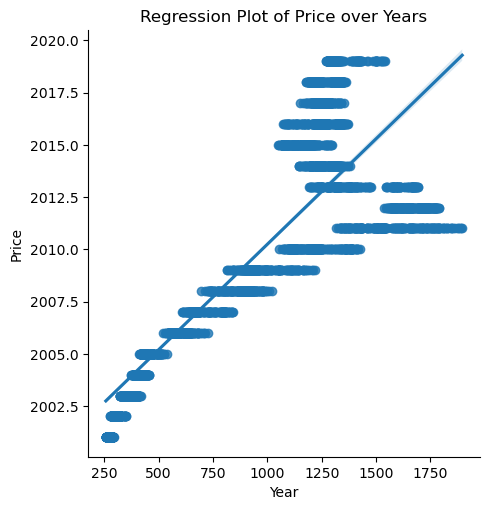

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x="Price",y="Year",data=df)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Regression Plot of Price over Years')
plt.show()

### Plot a histplot to find the variation in price

C:\Users\sojap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


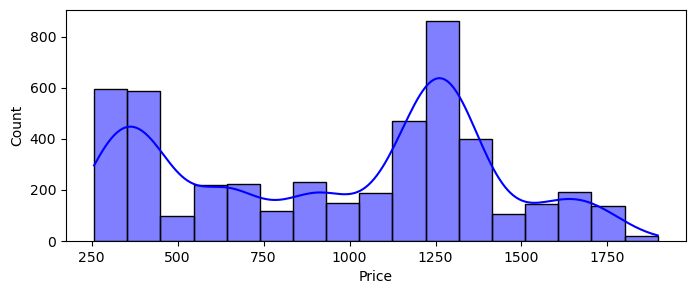

In [19]:
plt.figure(figsize=(8,3))
sns.histplot(df['Price'],kde=True,color='blue',)
plt.show()

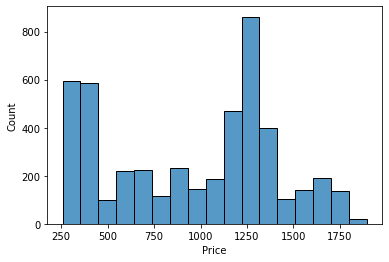

### Assign year and price in x and y variables

In [20]:
X = df[['Year']]
y = df['Price']

### Split the data into traning and testin set

We will train our model on the training set and then use the test set to evaluate the model

In [21]:
# import train_test split
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100)

In [23]:
X_train,y_train

(      Year
 683   2003
 2119  2009
 4615  2019
 662   2003
 4159  2017
 ...    ...
 4149  2017
 1890  2008
 350   2002
 79    2001
 3927  2016
 
 [3302 rows x 1 columns],
 683      374.90
 2119     940.00
 4615    1291.60
 662      363.30
 4159    1251.10
          ...   
 4149    1280.70
 1890     887.25
 350      318.25
 79       263.95
 3927    1326.15
 Name: Price, Length: 3302, dtype: float64)

## Train Data

In [24]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

### Create Linear Regression Model

In [26]:
lr = LinearRegression()

### Train the  model

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

### Check the score of our model

In [28]:
lr.score(X_train, y_train)

0.7048691960223041

### Check the coefficient and Intercept

In [30]:
#print the intercept

print(lr.intercept_)

-140074.32374779374


In [31]:
#print the coefficent
print(lr.coef_)

[70.17366927]


### Make Prediction with Test data

In [1]:
# Also store the predicted values in a variable
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

NameError: name 'LinearRegression' is not defined

### Create a new dataframe with actual and predicted values with year(X_test) as index

In [46]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=X_test.index)
results.head()

Actual    Predicted
962    425.50   553.709468
403    307.80   413.362129
3220  1335.75  1185.272491
1588   687.25   764.230476
2065   924.75   904.577814

### Check the mean absolute error, mean square error

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [48]:
# Mean absolute error
mean_absolute_error(y_test, y_pred)

186.2427389387367

In [49]:
# Mean squared error
mean_squared_error(y_test, y_pred)

58032.97376893121

### Predict the prices for the following years
   * 2025, 2026, 2027, 2028, 2030

In [55]:
v_df = df.drop(columns=['Date','month'])

In [57]:
x = v_df[['Year']]
y = v_df['Price']

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [71]:
import numpy as np
x_test = np.array([2025,2026,2027,2028,2030])
x_test = x_test.reshape(-1,1)
lr.predict(x)

array([ 340.36566096,  340.36566096,  340.36566096, ..., 1602.14022236,
       1602.14022236, 1602.14022236])

In [74]:
v_df.Year.max()

2019

***

# <span style = "color:green;font-size:40px"> Great Job!</span>